In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import keras

Using TensorFlow backend.


In [3]:
# load dataset
data = pd.read_csv('dataset/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [13]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# missing data checking
data.isnull().sum()

# as the result below, there are no missing values in these dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

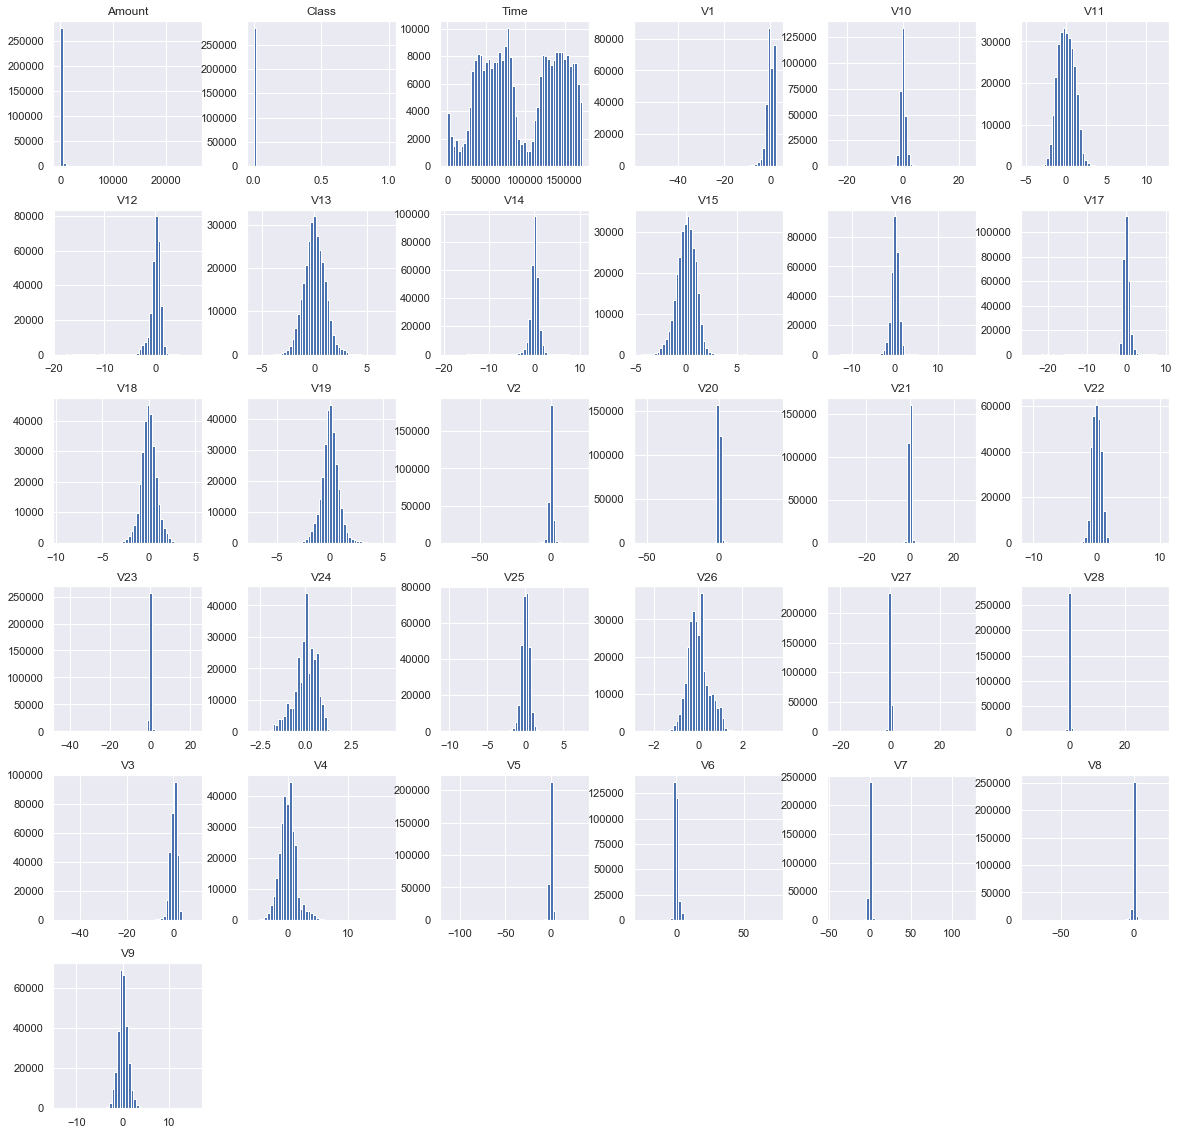

In [54]:
data.hist(figsize=(20, 20), bins=50)
plt.show()

In [52]:
# checking target 
data['Class'].value_counts()

# as the result below, there are an very imbalance dataset

0    284315
1       492
Name: Class, dtype: int64

C:\Users\Stock\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


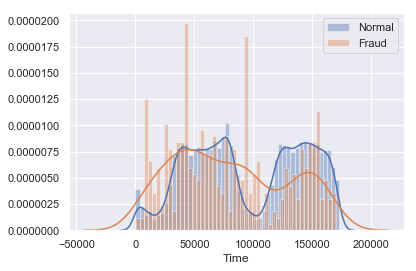

In [51]:
sns.distplot(data[data['Class']==0]['Time'], bins=50, label='Normal')
sns.distplot(data[data['Class']==1]['Time'], bins=50, label='Fraud')
plt.legend()

In [63]:
print('Max Amount: ', data['Amount'].max())
print('Max Amount Class: ', data[data['Amount'] == data['Amount'].max()]['Class'])

print('\n=========== Median Amount by diff Class ===========')
data.groupby('Class')['Amount'].median()

Max Amount:  25691.16
Max Amount Class:  274771    0
Name: Class, dtype: int64

=========== Median Amount by diff Class ===========


Class
0    22.00
1     9.25
Name: Amount, dtype: float64

In [72]:
# get the top 10 high correlation feature with target class
corr = data.drop(labels=['Class'], axis=1).corr()

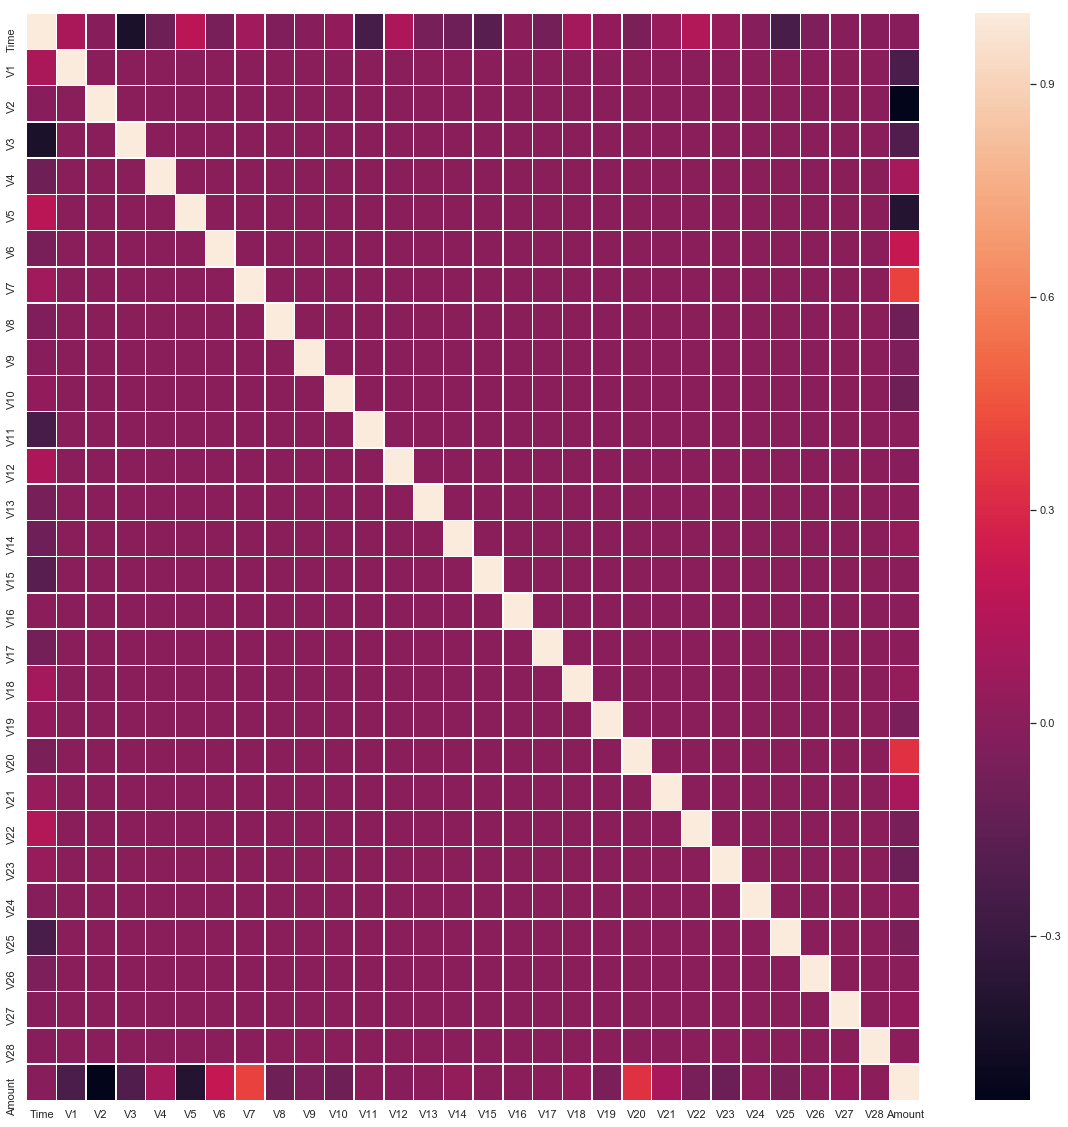

In [90]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, linewidths=.5)
plt.yticks(rotation=90)
plt.show()

In [118]:
c = corr.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[(so>=0.3)&(so!=1)]

Amount  V2        0.531409
V2      Amount    0.531409
V3      Time      0.419618
Time    V3        0.419618
V7      Amount    0.397311
Amount  V7        0.397311
V5      Amount    0.386356
Amount  V5        0.386356
        V20       0.339403
V20     Amount    0.339403
dtype: float64

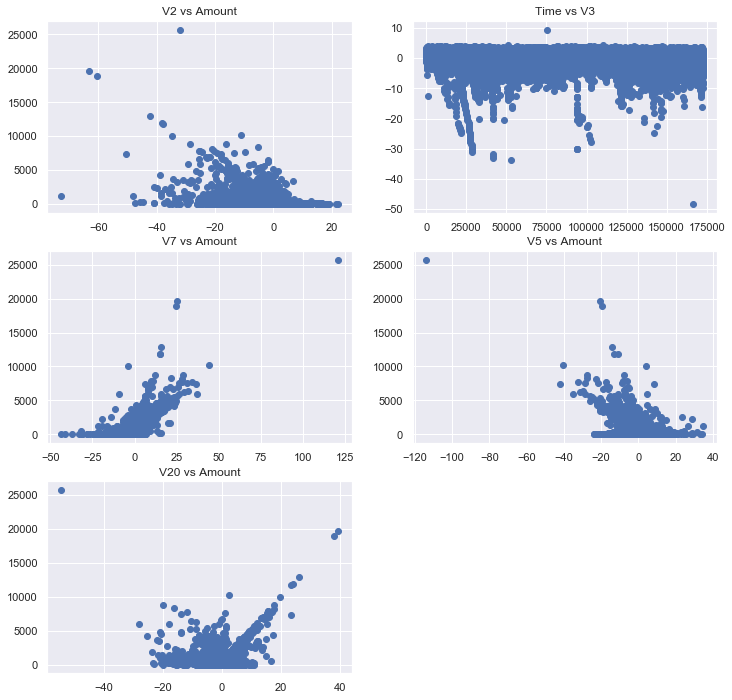

In [125]:
# using scatter plot to see the each pair relation
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.title('V2 vs Amount')
plt.scatter(data['V2'], data['Amount'])

plt.subplot(3, 2, 2)
plt.title('Time vs V3')
plt.scatter(data['Time'], data['V3'])

plt.subplot(3, 2, 3)
plt.title('V7 vs Amount')
plt.scatter(data['V7'], data['Amount'])

plt.subplot(3, 2, 4)
plt.title('V5 vs Amount')
plt.scatter(data['V5'], data['Amount'])

plt.subplot(3, 2, 5)
plt.title('V20 vs Amount')
plt.scatter(data['V20'], data['Amount'])

plt.show()

In [134]:
# checking whether having constant features
constant_feats = [feat for feat in data.drop('Class', axis=1).columns if data[feat].std() == 0]
print('# Constant features: ', len(constant_feats))

# there are no constant features


quasi_constant_feat = []
for feature in data.drop('Class', axis=1).columns:

    # find the predominant value
    predominant = (data[feature].value_counts() / np.float(
        len(data))).sort_values(ascending=False).values[0]

    # evaluate predominant feature
    if predominant > 0.998:
        quasi_constant_feat.append(feature)
print('# Quasi-Constant features: ', len(quasi_constant_feat))

# Constant features:  0
# Quasi-Constant features:  0


In [139]:
# divide input and output
X = data.drop(labels=['Class'], axis=1)
y = data['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Size of train set: ', X_train.shape)
print('Size of test set: ', X_test.shape)

print('\n===================================')
print('# Class 1 in train set:　', len(y_train[y_train==1]))
print('# Class 1 in test set:　', len(y_test[y_test==1]))

Size of train set:  (199364, 30)
Size of test set:  (85443, 30)

# Class 1 in train set:　 356
# Class 1 in test set:　 136


In [135]:
# imbalance dataset preprocess
from imblearn.over_sampling import SMOTE 

In [172]:
smote = SMOTE(k_neighbors=5, n_jobs=4)

X_train_rsm, y_train_rsm = smote.fit_sample(X_train, y_train)
X_train_rsm = pd.DataFrame(data=X_train_rsm, columns=X_train.columns)
print('# Class 1 in new train set:　', len(y_train_rsm[y_train_rsm==1]))

# Class 1 in new train set:　 199008


In [173]:
# build the ML model and make predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [174]:
# build the logisticRegression model
logi_cls = LogisticRegression()

# fit the model
logi_cls.fit(X_train_rsm, y_train_rsm)

# predict test set
y_pred_logi = logi_cls.predict(X_test)

C:\Users\Stock\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [176]:
# build the xgb model
rf_cls = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=4)

rf_cls.fit(X_train_rsm, y_train_rsm)

# predict test set
y_pred_rf = rf_cls.predict(X_test)

In [151]:
# evaluate metric
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [175]:
# cm with logistic regression model
confusion_matrix(y_test, y_pred_logi)

array([[84025,  1282],
       [   13,   123]], dtype=int64)

In [177]:
# cm with XGB model
confusion_matrix(y_test, y_pred_rf)

array([[84724,   583],
       [   12,   124]], dtype=int64)

In [161]:
# feature selection to reduce dimension
from sklearn.feature_selection import SelectFromModel

In [180]:
sel_ = SelectFromModel(rf_cls)
sel_.fit(X_train_rsm, y_train_rsm)

selected_feats = X_train_rsm.columns[sel_.get_support()]
selected_feats

Index(['V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')

In [183]:
# fit the model with selected features
logi_cls.fit(X_train_rsm[selected_feats], y_train_rsm)

y_pred_logi = logi_cls.predict(X_test[selected_feats])

confusion_matrix(y_test, y_pred_logi)

C:\Users\Stock\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[84300,  1007],
       [   11,   125]], dtype=int64)

In [184]:
rf_cls.fit(X_train_rsm[selected_feats], y_train_rsm)

y_pred_rf = rf_cls.predict(X_test[selected_feats])

confusion_matrix(y_test, y_pred_rf)

array([[84612,   695],
       [   12,   124]], dtype=int64)